In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error

num_iterations = 3

In [2]:
file_path = 'results/ast_per_min2015_0.csv'

df = pd.read_csv(file_path)

df.head()

,actual_mean_10,actual_mean_5,actual_median_10,actual_median_5,actual_null,label,linreg_mean_10,linreg_mean_5,linreg_median_10,linreg_median_5,linreg_null,rf_mean_10,rf_mean_5,rf_median_10,rf_median_5,rf_null
0,0.134848,0.134848,0.134848,0.134848,0.134848,Defense_aries-trikala_guy-marc-michel-1,0.028725,0.028725,0.028766,0.028725,0.029324,0.000000,0.000000,0.015789,0.000000,0.000000
1,0.026316,0.026316,0.026316,0.026316,0.026316,Defense_aries-trikala_rod-odom-1,0.041898,0.041898,0.042499,0.041898,0.038388,0.023654,0.029074,0.035929,0.026804,0.036364
2,0.238337,0.238337,0.238337,0.238337,0.238337,Defense_aries-trikala_josh-magette-1,0.152019,0.152019,0.142934,0.152019,0.153405,0.155893,0.143615,0.222212,0.167044,0.138979
3,0.000000,0.000000,0.000000,0.000000,0.000000,Defense_aries-trikala_garrett-williamson-1,0.071686,0.071686,0.066576,0.071686,0.071574,0.055831,0.050091,0.104421,0.030494,0.046032
4,0.000000,0.000000,0.000000,0.000000,0.000000,Defense_aries-trikala_janis-blums-1,0.055662,0.055662,0.059689,0.055662,0.055768,0.049273,0.080476,0.040294,0.036502,0.048261


In [3]:
actual = df.as_matrix(columns=['actual_mean_10'])

pred = df.as_matrix(columns=['linreg_mean_10'])

In [4]:
actual

array([[ 0.13484848],
       [ 0.02631579],
       [ 0.23833671],
       [ 0.        ],
       [ 0.        ],
       [ 0.05882353],
       [ 0.19907407],
       [ 0.03571429],
       [ 0.08902692],
       [ 0.125     ],
       [ 0.03333333],
       [ 0.07692308],
       [ 0.125     ],
       [ 0.        ],
       [ 0.        ],
       [ 0.07142857],
       [ 0.21637427],
       [ 0.05634921],
       [ 0.08249158],
       [ 0.1875    ],
       [ 0.        ],
       [ 0.        ],
       [ 0.025     ],
       [ 0.        ],
       [ 0.06227106],
       [ 0.03333333],
       [ 0.10833333],
       [ 0.15882353],
       [ 0.04688995],
       [ 0.13333333],
       [ 0.        ],
       [ 0.24777668],
       [ 0.0625    ],
       [ 0.14285714],
       [ 0.09090909],
       [ 0.        ],
       [ 0.14695652],
       [ 0.        ],
       [ 0.03703704],
       [ 0.13333333],
       [ 0.        ],
       [ 0.25      ],
       [ 0.        ],
       [ 0.18518519],
       [ 0.        ],
       [ 0

In [5]:
pred

array([[ 0.02872549],
       [ 0.04189784],
       [ 0.15201935],
       [ 0.07168602],
       [ 0.05566215],
       [ 0.04556156],
       [ 0.11259554],
       [ 0.03746078],
       [ 0.07791535],
       [ 0.07085369],
       [ 0.03088887],
       [ 0.07935852],
       [ 0.0566047 ],
       [ 0.05208757],
       [ 0.05501457],
       [ 0.04909273],
       [ 0.08776547],
       [ 0.04408975],
       [ 0.05770874],
       [ 0.05772032],
       [ 0.0252334 ],
       [ 0.05863561],
       [ 0.03809233],
       [ 0.04117858],
       [ 0.04943091],
       [ 0.04711037],
       [ 0.05768339],
       [ 0.06790271],
       [ 0.03252681],
       [ 0.0955119 ],
       [ 0.0252334 ],
       [ 0.10801551],
       [ 0.06638707],
       [ 0.08709186],
       [ 0.15589639],
       [ 0.05374093],
       [ 0.06794125],
       [ 0.04797051],
       [ 0.04793793],
       [ 0.04134028],
       [ 0.03646306],
       [ 0.03533817],
       [ 0.03968641],
       [ 0.13021373],
       [ 0.08929397],
       [ 0

In [10]:
np.sqrt(mean_squared_error(actual, pred))

0.05610748102905265

In [7]:
mean_absolute_error(actual, pred)

0.040246723204312426

In [8]:
np.mean(actual)

0.067759880317827148

In [9]:
np.mean(pred)

0.068766893545194135

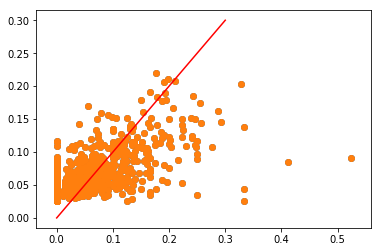

In [13]:
import matplotlib.pyplot as plt

plt.scatter(actual, pred)

plt.plot([0, 0.3], [0, 0.3], c='r')

plt.show()

In [14]:
resid = actual - pred

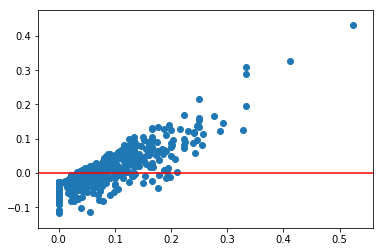

In [17]:
plt.scatter(actual, resid)

plt.axhline(y=0, c='r')

plt.show()

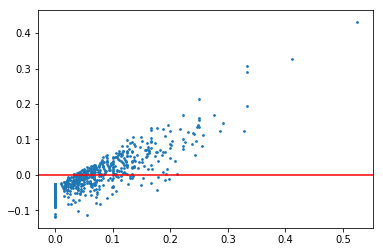

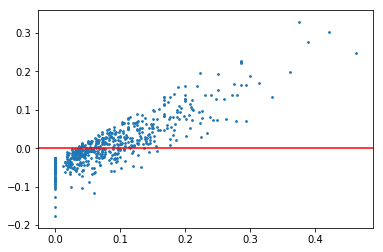

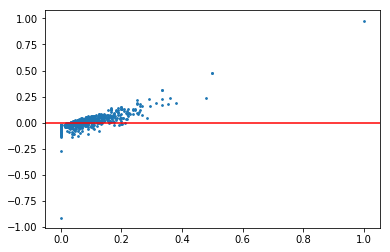

In [27]:
num_iterations = 3

actuals = []
preds = []

for i in range(num_iterations):
    file_path = 'results/ast_per_min2015_{}.csv'.format(i)
    df = pd.read_csv(file_path)
    
    actual = df.as_matrix(columns=['actual_mean_10'])
    actuals.append(actual)

    
    pred = df.as_matrix(columns=['linreg_mean_10'])
    preds.append(pred)
    
    resid = actual - pred
    
    plt.scatter(actual, resid, s=3)

    plt.axhline(y=0, c='r')

    plt.show()
    

# combine

actuals_arr = np.vstack(actuals)
preds_arr = np.vstack(preds)


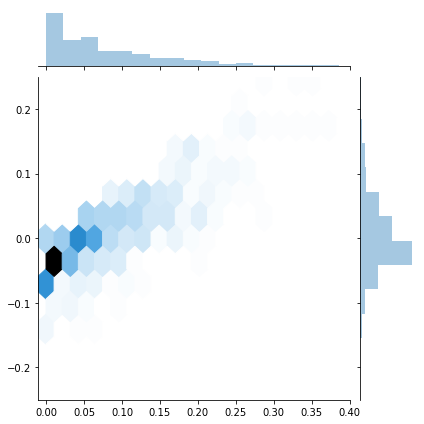

In [25]:
import seaborn as sns

sns.jointplot(x=actual, y=resid, kind='hex',stat_func=None, xlim=(-0.01, 0.4), ylim=(-0.25, 0.25))
plt.show()

In [22]:
heatmap, xedges, yedges = np.histogram2d(resid, actual, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

ValueError: too many values to unpack (expected 2)

In [19]:
plt.scatter(actuals_arr, preds)

plt.axhline(y=0, c='r')

plt.show()

(2007, 1)